# SUPPORT VECTOR MACHINE

## CONTENT
<br>

1. [What is Support Vector Machine(SVM)](#1)
1. [SVM Parameters](#2)
1. [Import Libraries and Read Data](#3)
1. [Visualize Data](#4)
1. [Create and Evaluate Model](#5)

## <a id=1></a>What is Support Vector Machine (SVM)

SVM or Support Vector Machine algorithm tries to draw a hyperplane between two classes to seperate them. There can be many hyperplane but SVM's purpose is finding maximum margin or finding maximum distance between data points from each classes. This data points are nearest data points to hyperlane from each classes. Let's look image below it explains better.
<br>
<img src="https://lh6.googleusercontent.com/r0dB9ntNr6FWOOLf6GqVUF72K4iBV_oR7IgAl3RO61WpDnIpgkwNhmjxjtMwNIN-23MMlJAnTFe0a2ZqXxMNF0WursGwV5bHaqRMmiCyEyH21k4e6Tj5DFBr2ck4DMgS-FkNz5fl" width=400 />

Also SVM uses a technique called **kernel trick** to transform the data. If datapoints have low dimensional space and it wouldn't be able to draw a hyperplane it tries to add a new dimension to data.
<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-8a4a30421342fedb9bdda38fbd2529a8" />
Now I'll explain some parameters in SVM and we'll try to use SVM to classify voices according to features.

## <a id=2></a>SVM - Parameters

**C Parameter**
<br>
C parameter controls trade-off between training points.
- Small C: Large margin
- Large C: Small margin, it has potential to overfit.
<br>
If you ask which is better to use, answer is 'it depends on your data'. It would be better if you try different C values to find best score.
<br>
<img src="https://www.learnopencv.com/wp-content/uploads/2018/07/svm-parameter-c-example.png" />

**Kernel**
<br>
You can choose the kernel type used by SVM. It can be ‘linear’, ‘rbf’, ‘poly’, ‘sigmoid’, ‘precomputed’.
And yes, answer is still same 'it depends your data'.
<br>
<img src="http://dataaspirant.com/wp-content/uploads/2017/01/Iris_Petal_Svm.png" />

**Gamma Parameter**
<br>
It is kernel coefficient. You use it if you choose 'rbf', 'poly' or 'sigmoid' as a kernel.

Also there is 'degree' parameters. It is used for 'poly' kernel to define degree of polynomial kernel. It is 3 by default.

## <a id=3></a> Import Libraries and Read Data

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Read Data
df = pd.read_csv("input/voice.csv")

In [57]:
# First 5 Rows of Data
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [58]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


## <a id=4></a>Visualize Data

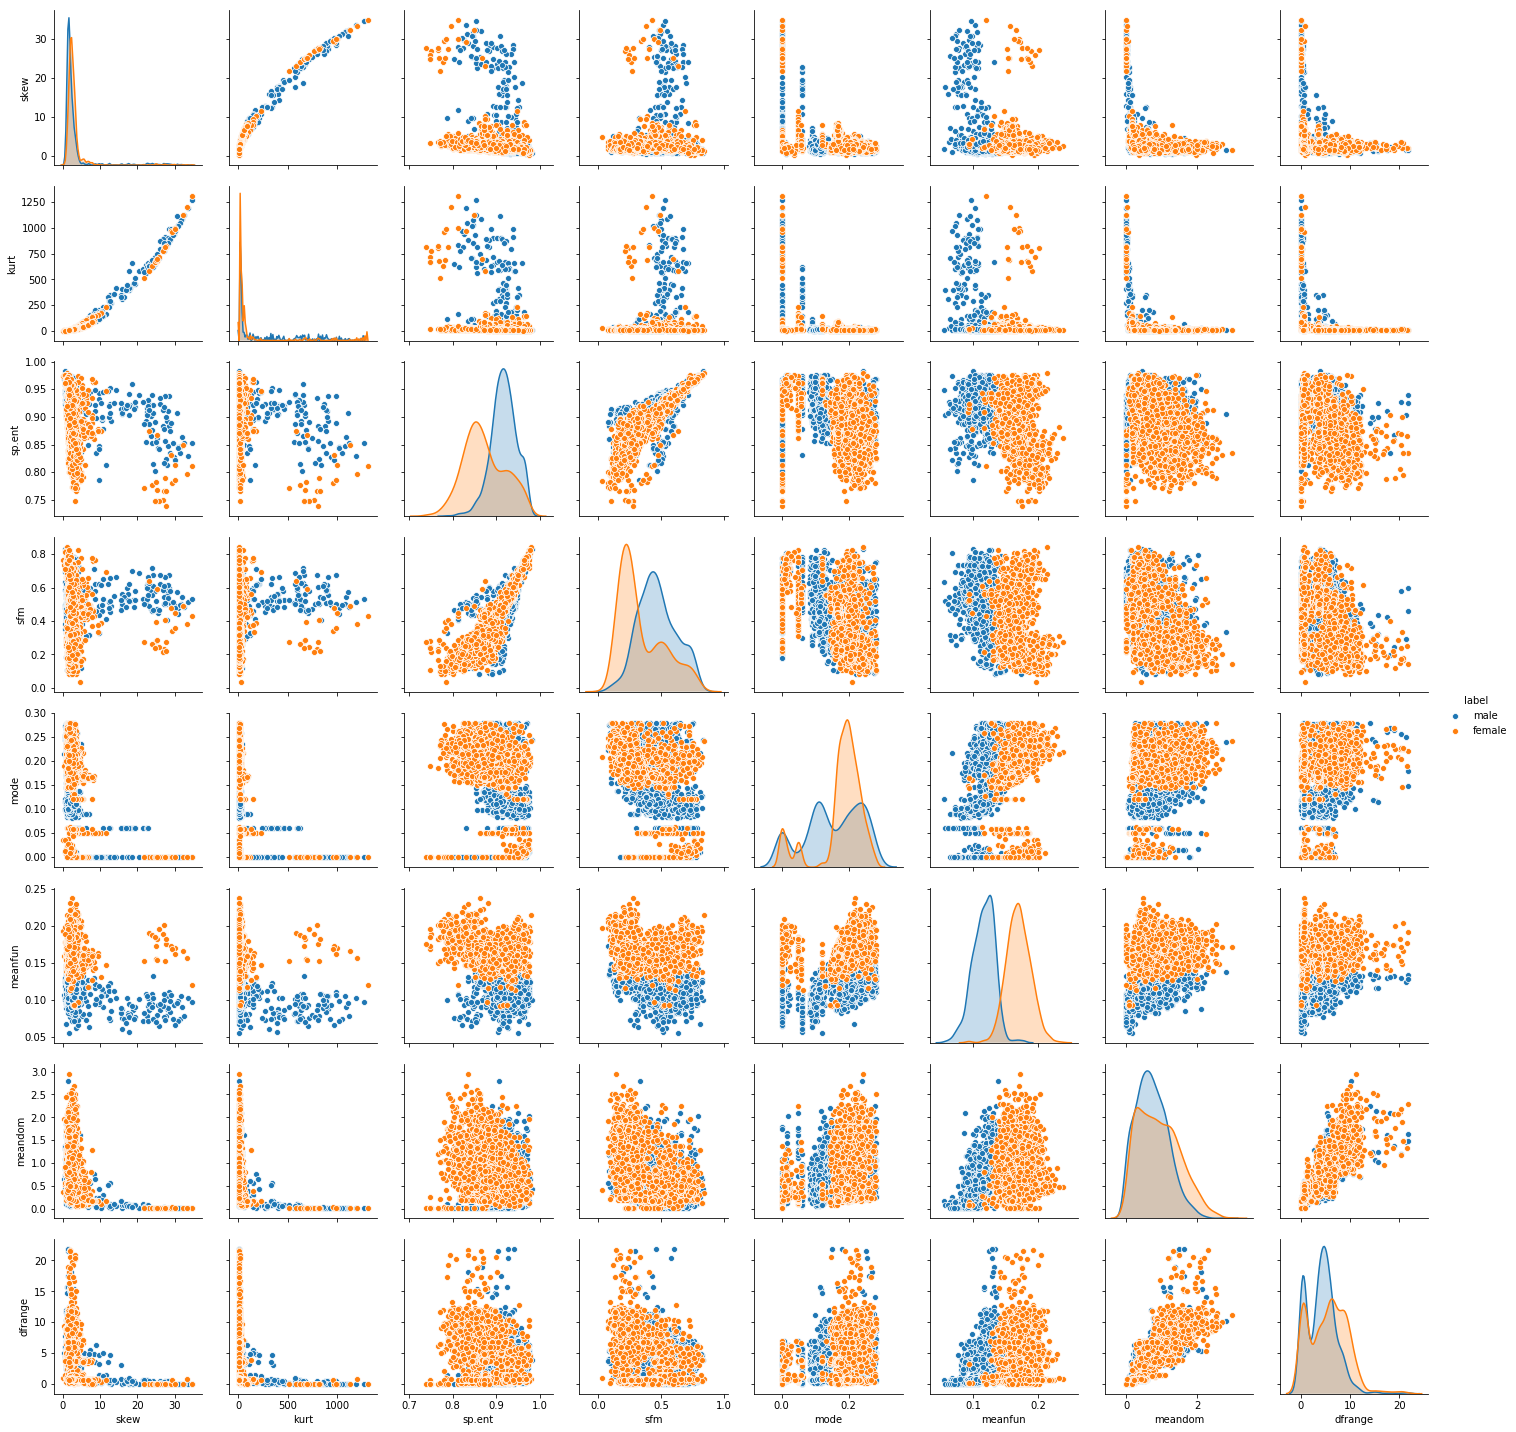

In [60]:
sns.pairplot(df, hue='label', vars=['skew', 'kurt',
       'sp.ent', 'sfm', 'mode','meanfun',
       'meandom','dfrange'])
plt.show()

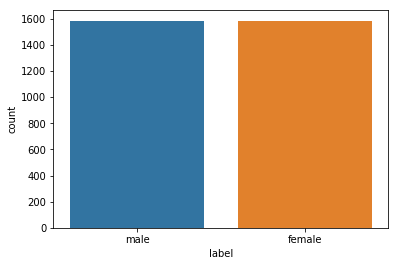

In [61]:
sns.countplot(df.label)
plt.show()

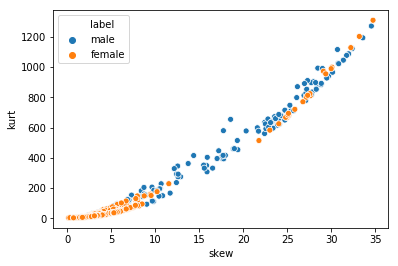

In [62]:
sns.scatterplot(x = 'skew', y = 'kurt', hue = 'label', data = df)
plt.show()

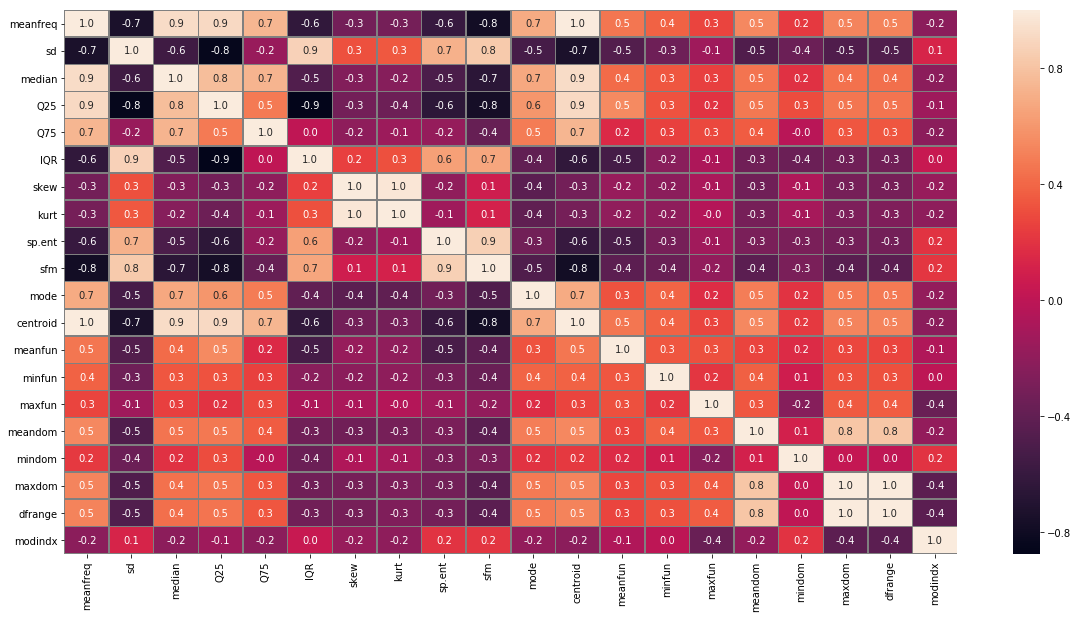

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidth=.5, fmt='.1f', linecolor = 'grey')
plt.show()

## <a id=5></a>Create and Evaluate Model

In [64]:
X = df.drop(['label'],axis=1)
y = df.label

We'll use 70% of our data to train our model and we'll test it with 30% of the data.

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [66]:
# Import SVM
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
y_pred = svm.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
cm = confusion_matrix(y_test, y_pred)

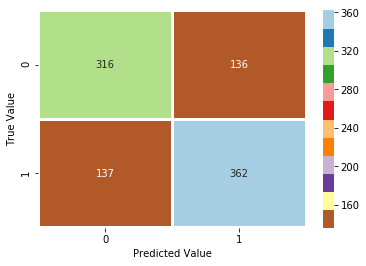

In [70]:
sns.heatmap(cm, annot=True, cmap="Paired_r", linewidth=2, linecolor='w', fmt='.0f')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

In [71]:
print("Test Accuracy: {:.2f}%".format(svm.score(X_test, y_test)*100))

Test Accuracy: 71.29%


Our accuracy is not well and as you can see confusion matrix above our prediction is not good. So let's try to improve our model. At first we'll normalize our data after that we'll apply some parameter optimizations.

In [72]:
# Normalization
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Let's fit our model.

In [74]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
y_pred = svm.predict(X_test)

In [76]:
cm = confusion_matrix(y_test,y_pred)

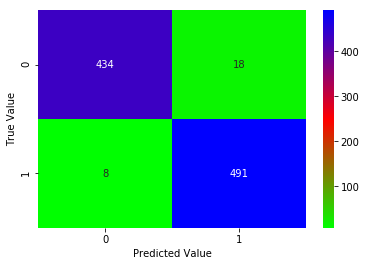

In [77]:
sns.heatmap(cm, annot=True, fmt='.0f', cmap='brg_r')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

In [78]:
print("Test Accuracy: {:.2f}%".format(svm.score(X_test, y_test)*100))

Test Accuracy: 97.27%


Wow! Our score increase 97.27% and all we did is normalize the data! We can see importance of normalizaton in here. Let's try to find best parameters for our model.

In [79]:
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel' : ['rbf', 'poly', 'sigmoid', 'linear']}

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

In [82]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9608108108108108, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.959404600811908, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9607046070460704, total=   0.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.9756756756756757, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.9783491204330176, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=poly, score=0.9796747967479674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.5108108108108108, total=   0.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.510148849797023, total=   0.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.510840108401084, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9459459459459459, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9675236806495264, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9634146341463414, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ..

[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9648173207036536, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.967479674796748, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9378378378378378, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9553450608930988, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9607046070460704, total=   0.1s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.9148648648648648, total=   0.2s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.9472259810554804, total=   0.2s
[CV] C=1, gamma=0.1, kernel=sigmoid ..........

[CV]  C=10, gamma=0.1, kernel=linear, score=0.9756756756756757, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9756427604871448, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.975609756097561, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9621621621621622, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9688768606224628, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9661246612466124, total=   0.1s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.5108108108108108, total=   0.2s
[CV] C=10, gamma=0.01, kernel=poly .

[CV]  C=100, gamma=0.01, kernel=poly, score=0.8333333333333334, total=   0.2s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9756756756756757, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9756427604871448, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9728997289972899, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.977027027027027, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9742895805142084, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9728997289972899, total=   0.1s
[CV] C=100, ga

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   44.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [83]:
print("Best Parameters: ",grid.best_params_)

Best Parameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [84]:
grid_pred = grid.predict(X_test)

In [85]:
cmNew = confusion_matrix(y_test, grid_pred)

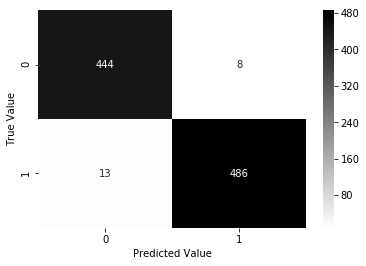

In [86]:
sns.heatmap(cmNew, annot=True, fmt='.0f', cmap='gray_r')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

In [87]:
print("Test Accuracy: {:.2f}%".format(grid.score(X_test, y_test)*100))

Test Accuracy: 97.79%


In [88]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

      female       0.97      0.98      0.98       452
        male       0.98      0.97      0.98       499

   micro avg       0.98      0.98      0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



Our test score incresed a little bit again and we reach **97.79%** of accuracy.